In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3

# graficos embebidos
%matplotlib inline

In [2]:
try:
    # Change the current working Directory to the quantification dir
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")
s_path=os.getcwd()
print(s_path)

Directory changed
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data


#### require mathplot_venn library
pip3 install matplotlib_venn <br>
matplotlib-venn-0.11.5
<br>
**Los conjuntos eliminan los elementos duplicados**

### Subset 1: Control
**Crea la lista de genes en ceros del conjunto de datos de control "Dataset1"**

In [3]:
file="healthy_geneIDs_with_zeros.csv"   #all_infected_geneIDs_with_zeros.csv
df= pd.read_csv(file, sep='\t', header=None)

In [4]:
df.head(5)

,0
0,AT1G01280
1,AT1G01305
2,AT1G01335
3,AT1G01400
4,AT1G01410


In [5]:
print(df.shape)
print(df.columns)
set1_ctrl=df[0].drop_duplicates().to_list()
len(set1_ctrl)

(5228, 1)
Int64Index([0], dtype='int64')


5228

### Subset 2: Tratamientos
**Crea la lista de genes en ceros del conjunto de datos de tratamientos "Dataset2"**

In [6]:
file="infected_geneIDs_with_zeros.csv"
df= pd.read_csv(file, sep='\t', header=None)

In [7]:
print(df.shape)
print(df.columns)
set2_infect=df[0].drop_duplicates().to_list()
len(set2_infect)

(3415, 1)
Int64Index([0], dtype='int64')


3415

### Universal Set: based on CDS of the Araport11 annotation
**Ahora. Crea el conjunto universal. <br>
Lista de genes codificantes a proteinas en la anotación Araport11.**

In [8]:
file='../meta-data/ID_samples.csv'
df= pd.read_csv(file, sep='\t', header=None)
print(df.shape)
print(df.columns)
set_universal=df[0].drop_duplicates().to_list()
len(set_universal)

(26, 1)
Int64Index([0], dtype='int64')


26

### Genes with zero counts in both datasets

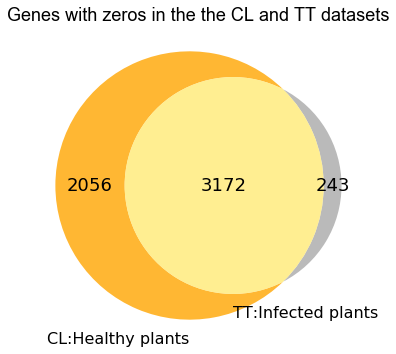

In [26]:
axis_font = {'fontname':'Arial', 'size':'18'}

plt.figure(figsize=(6,6))
diagram=venn2([set(set1_ctrl), set(set2_infect)], 
              set_labels = ('CL:Healthy plants', 'TT:Infected plants'),
              set_colors=('orange', 'darkgrey'), alpha = 0.8)

plt.title("Genes with zeros in the the CL and TT datasets", **axis_font)

for t in diagram.set_labels: t.set_fontsize(16)
for t in diagram.subset_labels: t.set_fontsize(18)

plt.show()

## Hasta aqui para la tesis

### Compración de los genes apagados en los dos subconjuntos principales con respecto al conjunto universal

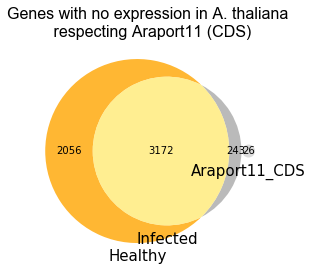

In [10]:
axis_font = {'fontname':'Arial', 'size':'16'}

diagram=venn3([set(set1_ctrl), set(set2_infect), set(set_universal)], 
             set_labels = ('Healthy', 'Infected', 'Araport11_CDS'),
             set_colors=('orange', 'darkgrey','lightgray'), alpha = 0.8)

for t in diagram.set_labels: t.set_fontsize(15)
#for t in diagram.subset_labels: t.set_fontsize(16)

plt.title("Genes with no expression in A. thaliana \n respecting Araport11 (CDS)", **axis_font)
plt.show()

El argumento indica el tamaño relativo de los tres subconjuntos en este orden: Ab (izquierda), aB (derecha), AB (intersección). Así, la tupla (1, 2, 1) dibujaría el conjunto B del doble de tamaño respecto de A.<br>
Para identificar a cada uno de los subconjuntos (tres en diagramas de dos conjuntos) el módulo utiliza una nomenclatura que consiste en colocar un 1 para indicar que la sección está incluida en el conjunto y un 0 para indicar que está excluida. De esta manera. Siguiendo el orden «ABC», el subconjunto 10 es el de la izquierda (el que pertenece a A pero no a B); el 01, el de la derecha (el que pertenece a B pero no a A); y el 11, el del medio (la intersección).

### Operaciones lógicas 

In [11]:
# Cardinalidad de un conjunto con len().
### print("La cardinalidad del conjunto A.thaliana sana = {0} es {1}".format(set1_ctrl,len(set1_ctrl)))  
print("La cardinalidad del conjunto A.thaliana sana es {0}".format(len(set1_ctrl)))  
print("La cardinalidad del conjunto A.thaliana infectada es {0}".format(len(set2_infect)))  

La cardinalidad del conjunto A.thaliana sana es 5228
La cardinalidad del conjunto A.thaliana infectada es 3415


In [12]:
# To logical operations data need to be as set dtype
set1_ctrl = set(set1_ctrl)
# set1_ctrl
set2_infect = set(set2_infect)

In [13]:
# Igualdad
set1_ctrl == set2_infect

False

In [14]:
# Subconjunto
# ¿estan los genes del conjunto de infectadas en el conjunto de control?
set2_infect.issubset(set1_ctrl)

False

In [15]:
## Subconjunto propio
# set2_infect != set1_ctrl
set2_infect.issubset(set1_ctrl) and set2_infect != set1_ctrl
#               FALSE AND TRUE

False

In [16]:
union=set2_infect.union(set1_ctrl)
len(union)

5471

In [17]:
# Intersección de conjuntos
intersec=set2_infect.intersection(set1_ctrl)
lst_intersec=list(intersec)
print(lst_intersec)
len(lst_intersec)

['AT1G32020', 'AT5G53960', 'AT5G60520', 'AT4G16983', 'AT3G61177', 'AT2G16835', 'AT2G31082', 'AT1G34290', 'AT2G07692', 'AT3G23970', 'AT4G17850', 'ATMG00430', 'AT4G32230', 'AT2G01045', 'AT1G58450', 'AT3G44180', 'AT4G29103', 'AT5G39690', 'AT3G52000', 'AT5G56390', 'AT2G06425', 'AT4G04650', 'AT2G03180', 'AT5G35604', 'AT3G09990', 'AT5G53600', 'AT4G23090', 'AT5G43518', 'AT4G22100', 'AT2G04480', 'AT1G13760', 'AT1G51260', 'AT4G35660', 'AT5G54460', 'AT3G47920', 'AT5G09490', 'AT1G27260', 'AT3G61826', 'AT2G18070', 'AT2G11005', 'AT1G31090', 'AT1G52490', 'AT4G10700', 'AT5G43525', 'AT1G53945', 'AT2G32300', 'AT5G61700', 'AT2G03567', 'AT3G22050', 'AT4G20590', 'AT5G45860', 'AT4G03566', 'AT1G35170', 'AT1G74385', 'AT5G01080', 'AT1G09245', 'AT1G57760', 'AT5G34908', 'AT1G33870', 'AT2G35090', 'AT1G33910', 'AT5G26717', 'AT2G05250', 'AT3G58280', 'AT5G55132', 'AT1G65113', 'AT3G20880', 'AT2G01050', 'AT3G32280', 'AT3G48231', 'AT5G65100', 'AT2G07701', 'AT4G10595', 'AT5G51500', 'AT3G30730', 'AT2G27145', 'AT3G29830'

3172

In [18]:
# Diferencia entre conjuntos
dif_ctrl=set1_ctrl - set2_infect
len(dif_ctrl)


2056

In [19]:
dif_inf= set2_infect-set1_ctrl
lst_only_infect=list(dif_inf)
print(lst_only_infect)
len(dif_inf)

['AT4G03380', 'ATMG00400', 'AT1G64000', 'AT4G15980', 'AT1G58265', 'AT1G20687', 'AT1G50325', 'AT3G24220', 'AT4G23070', 'AT1G57780', 'AT3G46616', 'AT1G47940', 'AT4G03157', 'AT1G14160', 'AT1G48730', 'AT1G43810', 'AT4G00342', 'AT2G03823', 'AT5G14990', 'AT1G11690', 'AT2G04910', 'AT2G18920', 'AT2G15670', 'AT4G09360', 'AT5G05770', 'AT3G45220', 'AT2G07640', 'AT1G08005', 'AT2G22145', 'AT4G25790', 'AT1G69860', 'AT5G14340', 'AT1G72110', 'AT3G22090', 'AT2G35200', 'AT3G18957', 'AT4G04580', 'AT5G35950', 'AT1G70860', 'AT1G24390', 'AT2G43261', 'AT5G52655', 'AT5G05635', 'AT1G58223', 'AT2G28700', 'AT1G54760', 'AT1G55947', 'AT5G20447', 'AT2G04037', 'AT1G31400', 'AT5G44950', 'AT3G19890', 'ATMG01240', 'AT2G34325', 'AT5G05150', 'AT4G28068', 'AT4G21745', 'AT1G07645', 'AT5G55507', 'AT1G60987', 'AT4G16024', 'AT3G22020', 'AT4G01240', 'AT1G79100', 'AT5G41660', 'AT4G21213', 'AT5G67120', 'AT1G60340', 'AT3G66656', 'AT5G05280', 'AT5G19710', 'AT1G02490', 'AT4G00080', 'AT3G60990', 'AT2G18640', 'AT5G17167', 'AT1G54475'

243

In [20]:
## Save the gene IDs with ceros in a file 
with open("infected_exclusive_geneIDs_in_zero.csv", "w") as outfile:
    outfile.write("\n".join(str(item) for item in lst_only_infect))

Resources: <br>
https://pypi.org/project/matplotlib-venn/  <br>
https://recursospython.com/guias-y-manuales/diagramas-de-venn-con-matplotlib/  <br>
https://relopezbriega.github.io/blog/2015/10/11/conjuntos-con-python/ <br>   